# Prediction of 'Delivery Time' using 'Sorting Time'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
data= pd.read_csv("D:/data_structure/simple_linear_regression/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
#Initial analysis

data.shape #check how many rows and columns available

(21, 2)

In [10]:
data.isnull().sum() #check if there is any null value

Delivery Time    0
Sorting Time     0
dtype: int64

In [12]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

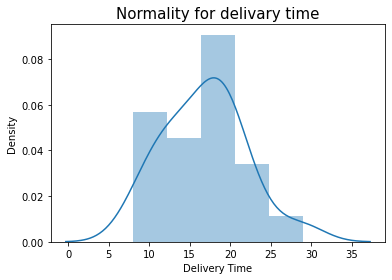

In [15]:
#assumption check


#normality check

sns.distplot(a=data['Delivery Time'])
plt.title('Normality for delivary time',size=15)
plt.show()

In [17]:
data['Delivery Time'].skew()        #the acceptable range for skewness is 0 to +0.5/ 0 to -0.5

0.3523900822831107

In [18]:
data['Delivery Time'].kurt()  #the acceptable range for kurtosis is 3 to -3

0.31795982942685397

# Normality Test Failed

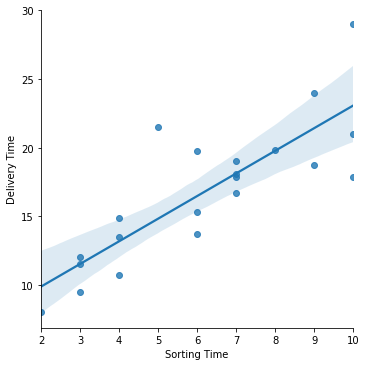

In [20]:
#Linearity Test


sns.lmplot(x='Sorting Time',y='Delivery Time',data=data)

# Linearity test Failed

In [21]:
#Multicollinearity Test
#We cannot perform multi collinearity test as we have only one input, we can say that multicollinearity test is passed
#Auto Regression Test
#We cannot perform auto regression test as the input feature we have is not time based, so it is also passed

In [22]:
data = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model Building , Model Training & Model Testing Using statsmodel

In [23]:
import statsmodels.formula.api as smf

In [24]:
linear_model=smf.ols(formula='delivery_time~sorting_time', data=data).fit()
linear_model

In [25]:
#Finding slope and intercept
linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

# Model Testing

In [26]:
#Finding tvalues, pvalues
linear_model.tvalues, linear_model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

# Model Predictions

In [27]:
#Manual prediction for say sorting time= 4
#y=mx+c
data = 1.649020*4+6.582734
data

13.178814

In [28]:
##Automated prediction for say sorting time = 4,9
new_data = pd.DataFrame(data={'sorting_time':[4,9]})
new_data

,sorting_time
0,4
1,9


In [29]:
Delivery_time=linear_model.predict(new_data)
Delivery_time

0    13.178814
1    21.423913
dtype: float64

In [30]:
##Automated prediction for say sorting time =5,16
new_data = pd.DataFrame(data={'sorting_time':[5,16]})
new_data

,sorting_time
0,5
1,16


In [31]:
Delivery_time=linear_model.predict(new_data)
Delivery_time

0    14.827833
1    32.967052
dtype: float64

# Model prediction is DONE

# 2.Build a prediction model for salary Hike

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
salary_data=pd.read_csv("D:/data_structure/simple_linear_regression/Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
#Initial analysis

In [35]:
salary_data.shape,
salary_data.dtypes


((30, 2),
 YearsExperience    float64
 Salary             float64
 dtype: object)

In [37]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [39]:
#Assumptions Check
# Normality Test

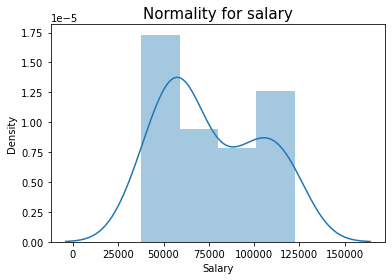

In [41]:
sns.distplot(a=salary_data['Salary'])
plt.title('Normality for salary',size = 15)
plt.show()

In [43]:
salary_data['Salary'].skew()  

0.35411967922959153

In [42]:
salary_data['Salary'].kurt()     

-1.295421086394517

# Linearity Test

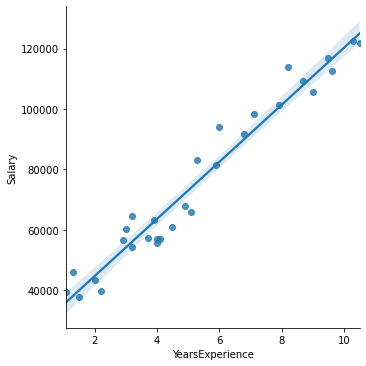

In [44]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.show()

In [45]:
#Almost all the points lie on straight line but there are some outliers, so Linearity Test also Failed

In [46]:
#Multicollinearity Test
#We cannot perform multi collinearity test as we have only one input, we can say that multicollinearity test is passed

#Auto Regression Test
#We cannot perform auto regression test as the input feature we have is not time based, so it is also passed

In [47]:
salary_data= salary_data.rename({'YearsExperience':'Experience','Salary':'salary'}, axis=1)
salary_data

,Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Model Building , Model Training & Model Testing Using statsmodel

In [50]:
import statsmodels.formula.api as smf

In [51]:
model=smf.ols(formula='salary~Experience', data=salary_data).fit()
model

In [52]:
#intercept and slope
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [53]:
#calculating t-values & p-values
model.tvalues, model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

# Model Prediction

In [54]:
#manual prediction for say experiance = 12 years
salary =  9449.962321*12+ 25792.200199
salary

139191.748051

In [55]:
#Automated prediction for say sorting time = 9
salary_pred = pd.DataFrame({'Experience':[9]})
salary_pred

,Experience
0,9


In [56]:
new_sal = model.predict(salary_pred)
new_sal

0    110841.861092
dtype: float64

In [57]:
#manual prediction for say experiance = 10,6 years
salary =9449.962321*10+ 25792.200199,9449.962321*6+ 25792.200199
salary

(120291.823409, 82491.97412500001)

In [58]:
#Automated prediction for say sorting time = 10,6
salary_pred = pd.DataFrame(data={'Experience':[10,6]})
salary_pred

,Experience
0,10
1,6


In [59]:
new_sal = model.predict(salary_pred)
new_sal

0    120291.823413
1     82491.974127
dtype: float64

# Model Prediction is DONE